## 1. Download Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


## 2. Load Dataset

In [ ]:
data=pd.read_csv("Mall_Customers.csv")

# 3. Perform,
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.rename(columns={"CustomerID":"customer_id","Gender":"gender","Age":"age","Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)":"spending_scores"},inplace=True)

There is no difference in age of rings for male and female (18-70).

**Count plot**

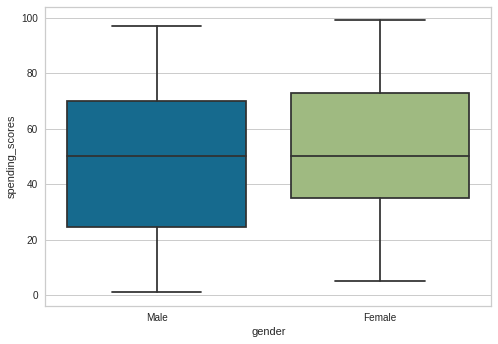

In [ ]:
# Count Plot
sns.boxplot(x=data['gender'],y=data['spending_scores'])

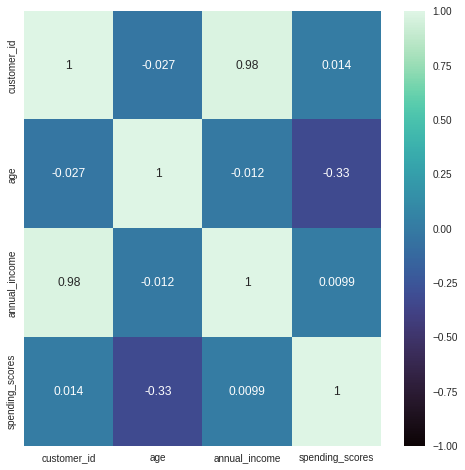

In [ ]:
# Correlation Plot
corr=data.corr()
plt.figure(figsize=(8,8))
sn=sns.heatmap(corr,vmin=-1,center=0, annot = True, cmap = 'mako')

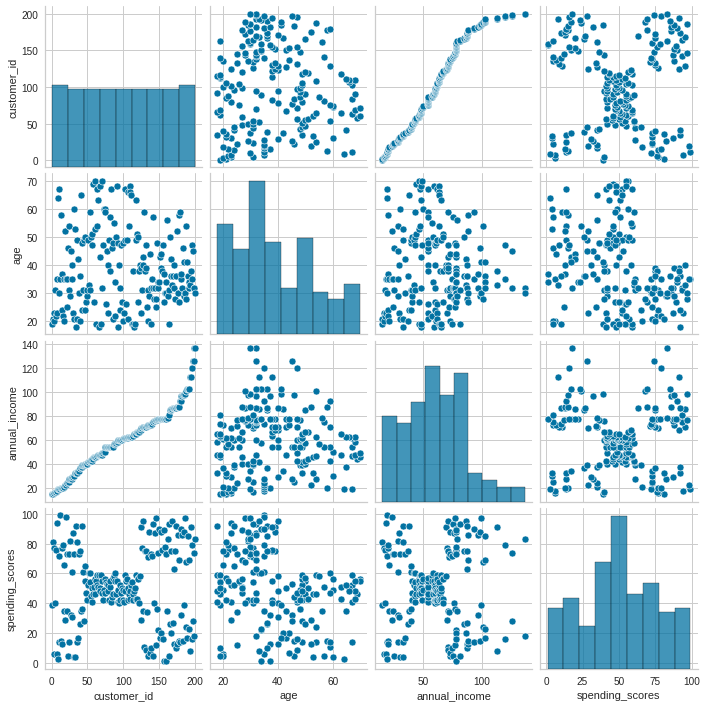

In [ ]:
sns.pairplot(data)

# 4. Descriptive statistics


In [ ]:
data.head(10)

,customer_id,gender,age,annual_income,spending_scores
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
data.shape

(200, 5)

In [ ]:
data.describe()

,customer_id,age,annual_income,spending_scores
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 5. Missing values


In [ ]:
data[data.duplicated()]

,customer_id,gender,age,annual_income,spending_scores


In [ ]:
data.isna().sum()

customer_id        0
gender             0
age                0
annual_income      0
spending_scores    0
dtype: int64

### there is no missing values and duplicates in dataframe

# 6. Outliers

In [ ]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3936fa33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3936fa3e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3936f9de10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3936fa9950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3936fa9e50>],
 'means': []}

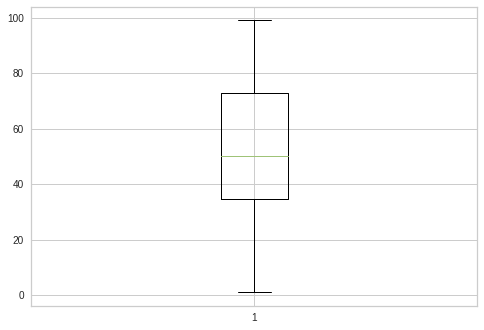

In [ ]:
plt.boxplot(data['spending_scores'])

# 7. Categorical columns check and Encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['gender']=encoder.fit_transform(data['gender'])

In [ ]:
data.head()

,customer_id,gender,age,annual_income,spending_scores
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0


# 8. Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler()
data1=df.fit_transform(data)

# 9. Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data.drop('customer_id',axis=1,inplace=True)

In [ ]:
km = KMeans(n_clusters=3, random_state=0)

In [ ]:
data['Group or Cluster'] = km.fit_predict(data)

In [ ]:
data.head()

,gender,age,annual_income,spending_scores,Group or Cluster
0,1,19.0,15.0,39.0,2
1,1,21.0,15.0,81.0,2
2,0,20.0,16.0,6.0,2
3,0,23.0,16.0,77.0,2
4,0,31.0,17.0,40.0,2


In [ ]:
data['Group or Cluster'].value_counts()

2    123
1     39
0     38
Name: Group or Cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(data, 
                         km.labels_, 
                         metric='euclidean')
score

0.3842057644019546